In [ ]:
from google.colab import files
uploaded = files.upload()


Saving water_quality_dataset.csv to water_quality_dataset.csv


Mounted at /content/drive


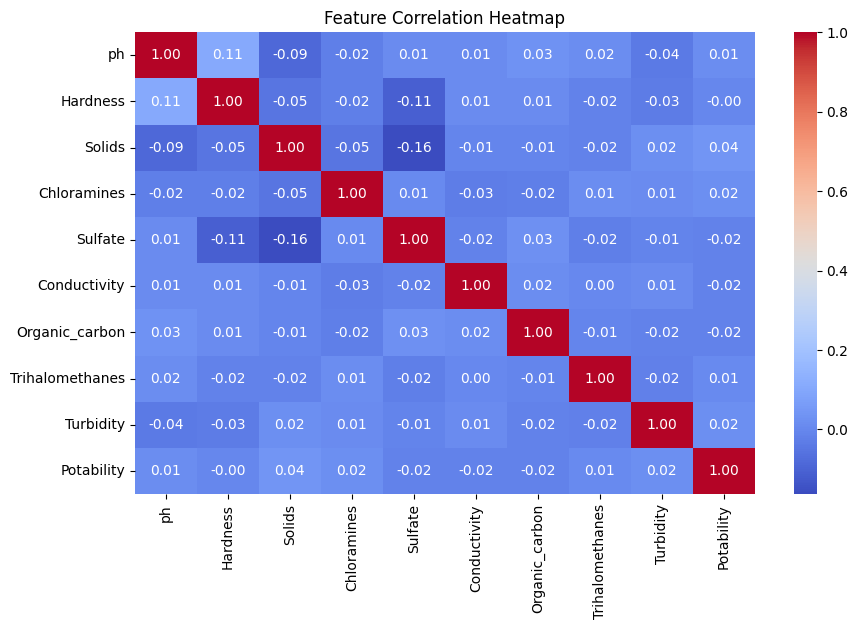

Model Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.84      0.73       231
           1       0.65      0.40      0.50       172

    accuracy                           0.65       403
   macro avg       0.65      0.62      0.62       403
weighted avg       0.65      0.65      0.63       403

✅ Model saved successfully as 'water_quality_model.pkl'


In [ ]:

!pip install pandas numpy scikit-learn joblib


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset (from Google Drive )
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/water_potability.csv')

# Data Cleaning
df.dropna(inplace=True)
df.fillna(df.mean(), inplace=True)

#Visualizations(heat Map)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature & Label Preparation(x&y values)
X = df.drop(columns=["Potability"])
y = df["Potability"]

#  Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Saving the Model
joblib.dump(model, 'water_quality_model.pkl')
print("✅ Model saved successfully as 'water_quality_model.pkl'")
